# Notes for 1/23/26 #

## Using Bootstrap to Estimate Confidence intervals ##

This segment of code shows how to create a sample from a population with a known (normal) distribution (with specified mean and variance) **and** then use the bootstrap method--resampling with replacement from the dataset to estimate the 95% confidence interval for the population mean.  That is, do with simulation what you normally do with the confidence interval formula in STAT 200.

In [11]:
import numpy as np

# Generate 5 random samples from a standard normal distribution (mean=0, std=1)
data = np.random.normal(loc=64, scale=2.5,size=50)

print(data)


[64.80008405 63.37753374 66.42307429 62.4407296  66.08250846 66.92838544
 63.16934417 64.00819674 65.65728381 66.52277111 70.91829509 60.27729332
 63.984996   61.02498453 63.19032324 66.82071006 66.13797132 63.73037581
 60.10889019 62.94129635 61.49123758 67.53946291 64.71450978 60.83923691
 61.59338164 63.81575836 57.11264371 68.03333003 65.58566971 60.82896711
 64.55776677 68.89552739 64.76525093 66.35645896 64.81644148 65.07578405
 67.15738213 66.42580126 61.85680322 65.68749389 64.20483044 66.66560246
 66.21082321 62.35383804 63.33324816 61.2211467  67.27549633 62.70034574
 61.09328131 66.62394892]


In [12]:
np.mean(data)

np.float64(64.34753032895384)

In [13]:
import numpy as np

# Original sample data (example: student test scores)
#data = np.array([63.1, 64.6, 63.4, 65.6, 63.4, 65.7, 64.6, 63.1, 65.9, 63.3])

# Configuration
n_iterations = 10000 # Number of bootstrap samples to generate
confidence_level = 0.95
n_size = len(data)

# Run bootstrap
means = []
for i in range(n_iterations):
    # Create a bootstrap sample by sampling with replacement
    bootstrap_sample = np.random.choice(data, size=n_size, replace=True)
    # Calculate the statistic (mean) and store it
    means.append(np.mean(bootstrap_sample))

# Calculate the confidence intervals using percentiles
# For a 95% CI, we use the 2.5th and 97.5th percentiles
alpha = (1.0 - confidence_level) / 2.0 * 100 # lower percentile (2.5)
lower_bound = np.percentile(means, alpha)
alpha = (confidence_level + (1.0 - confidence_level) / 2.0) * 100 # upper percentile (97.5)
upper_bound = np.percentile(means, alpha)

print(f"Original sample mean: {np.mean(data):.2f}")
print(f"{confidence_level*100:.1f}% Bootstrap Confidence Interval for the mean: [{lower_bound:.2f}, {upper_bound:.2f}]")


Original sample mean: 64.35
95.0% Bootstrap Confidence Interval for the mean: [63.62, 65.06]


In [5]:
import matplotlib.pyplot as plt

/opt/jupyterhub/jupyter_env/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


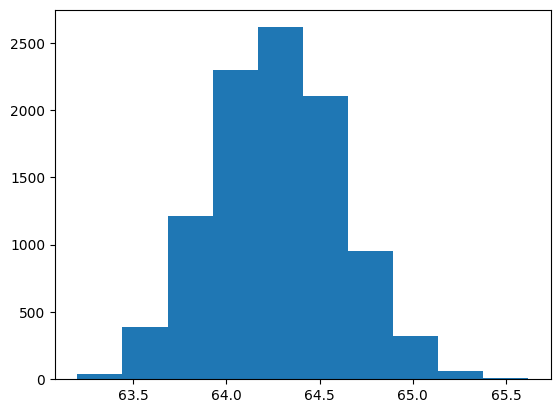

In [9]:
plt.hist(means)
plt.savefig("hist.png")
plt.show()

<Figure size 640x480 with 0 Axes>